In [366]:
pip install matplotlib, pandas, openpyxl, scikit-learn, plotly, --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'matplotlib,'

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Dimensionality Reduction: Principal Component Analysis

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [368]:
encoded_data = pd.read_excel('Datasets/Encoded_Data_for_Model_Training.xlsx')

In [369]:
encoded_data.head(3)

,age,ethnicity,income,disability,gender_female,gender_male,gender_non binary,education_Associate,education_Bachelor,education_Doctorate,...,employment_Employed Full time,employment_Employed Part time,employment_Retired,employment_Self employed,employment_Student,employment_Unemployed,choice_Empathetic,choice_Original,choice_Persuasive,choice_Simplier
0,3,0,1,0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,0,1,0,0,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,1,0,0,0,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


## Standardize the data

In [370]:
scaler = StandardScaler()
encoded_scaled = scaler.fit_transform(encoded_data)


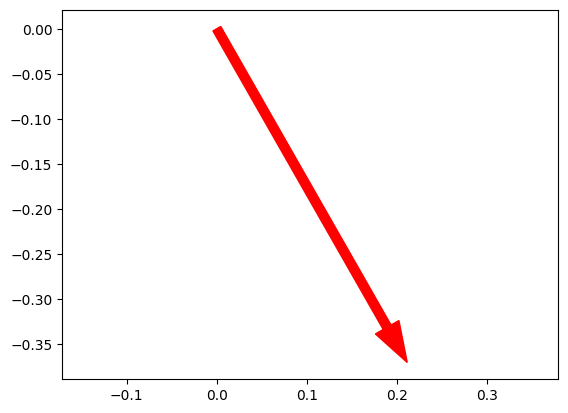

In [371]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean of the data
mean = np.mean(encoded_scaled, axis=0) 

# Assuming 'pca' is your PCA object
first_pc = pca.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on the same scale
plt.axis('equal')
plt.show()


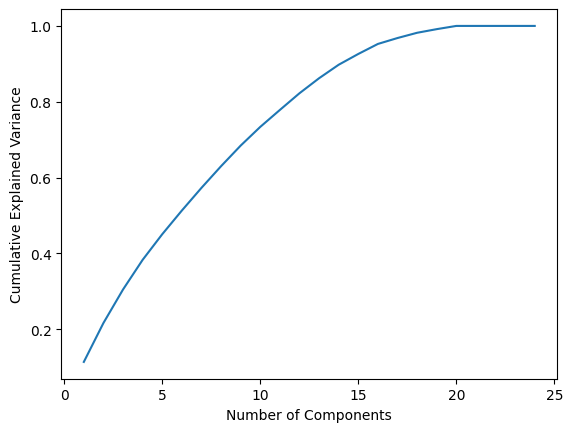

In [372]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(encoded_scaled)
# Elbow method to determine optinal number of components
# Proportion of variance explained criterion
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [373]:
encoded_scaled.shape

(400, 24)

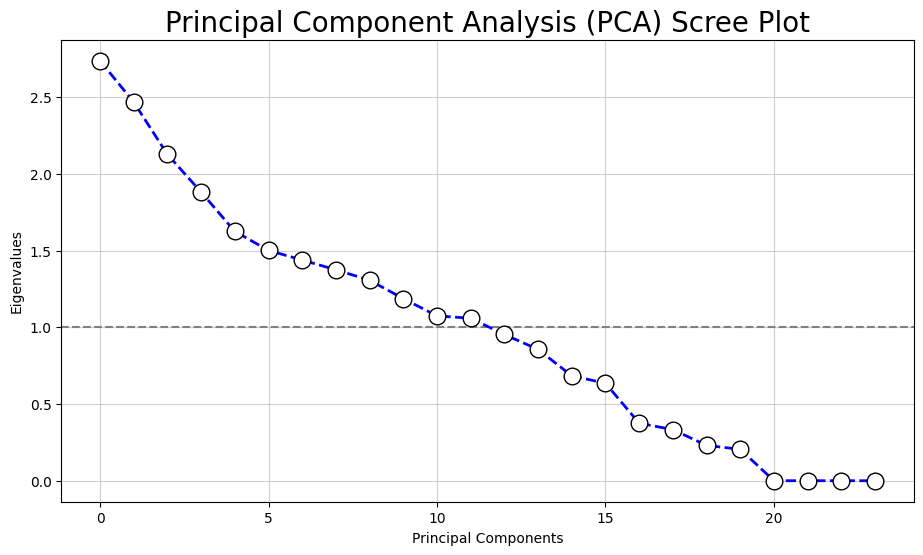

In [374]:
# Scree plot criterion for selecting principal components
covar_matrix = PCA(n_components = len(encoded_data.columns))
covar_matrix.fit(encoded_scaled)

# visualizing the eigenvalues obtained from performing Principal Component Analysis (PCA) on the dataset and identifying significant components based on a threshold (in this case, eigenvalues greater than 1) 
# Once a principal component's eigenvalue is on or below the threshold, it suggests that the corresponding principal component may not explain a significant amount of variance in the data

fig, ax = plt.subplots(figsize=(11, 6)) 

plt.ylabel('Eigenvalues')
plt.xlabel('Principal Components')
plt.title('Principal Component Analysis (PCA) Scree Plot', fontsize=20)
plt.style.context('seaborn-whitegrid')

# plt.xticks(range(len(covar_matrix.explained_variance_)))
for x_position in range(len(covar_matrix.explained_variance_)):
    plt.scatter(x_position, covar_matrix.explained_variance_[x_position])

plt.axhline(y=1, color='gray', linestyle='--')
plt.plot(covar_matrix.explained_variance_, color='blue', marker='o', linestyle='--', linewidth=2, markersize=12, markerfacecolor='white', markeredgecolor='black')

plt.grid(True, linestyle='-', alpha=0.6)

plt.show()


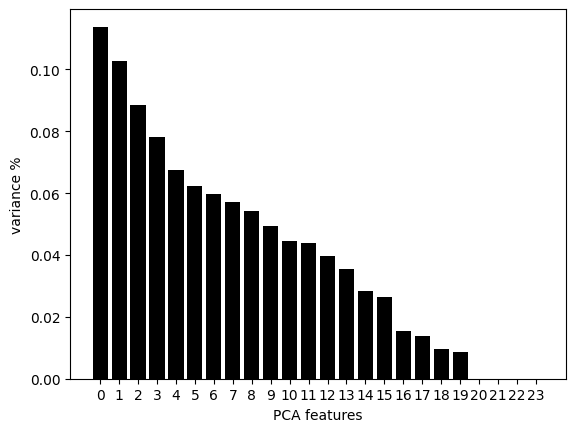

In [375]:
# the explained variance ratio of each principal component obtained from PCA-variance drop off point is 3
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

## Train PCA model with number of principal components

In [376]:
# PCA Implementation w the optimal # of components
pca = PCA(n_components = 3)
pca.fit(encoded_scaled)
pca_features = pca.transform(encoded_scaled)

In [377]:
print(pca.explained_variance_ratio_)
# [0.33593393 0.22480881 0.07688354 0.04955611 0.04310057 0.04153328, 0.03810368 0.03613872 0.03356749 0.03050254]

[0.11382632 0.10259188 0.0884387 ]


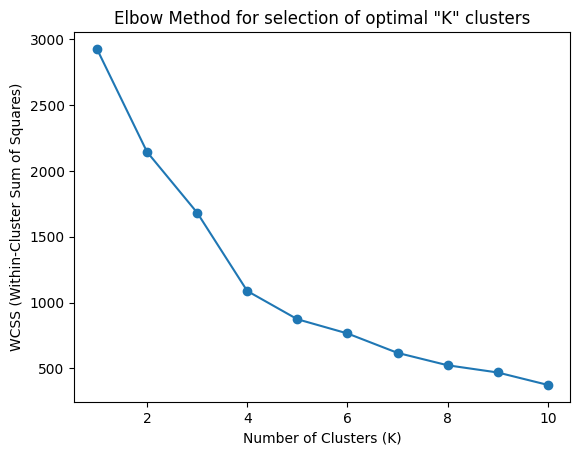

In [378]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for selection of optimal "K" clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

For n_clusters = 2, the average silhouette score is: 0.3174492485778584
For n_clusters = 3, the average silhouette score is: 0.3441172632113813
For n_clusters = 4, the average silhouette score is: 0.42268660133604813
For n_clusters = 5, the average silhouette score is: 0.4438398273801164
For n_clusters = 6, the average silhouette score is: 0.3403982432183737
For n_clusters = 7, the average silhouette score is: 0.35340985439075395


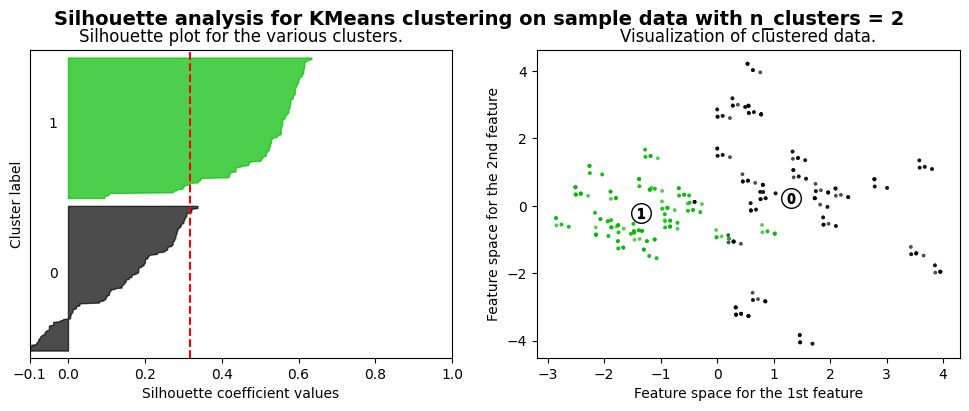

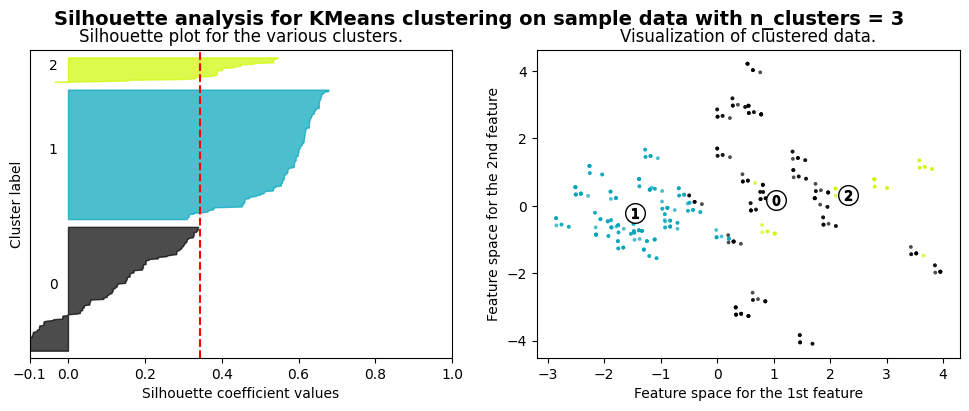

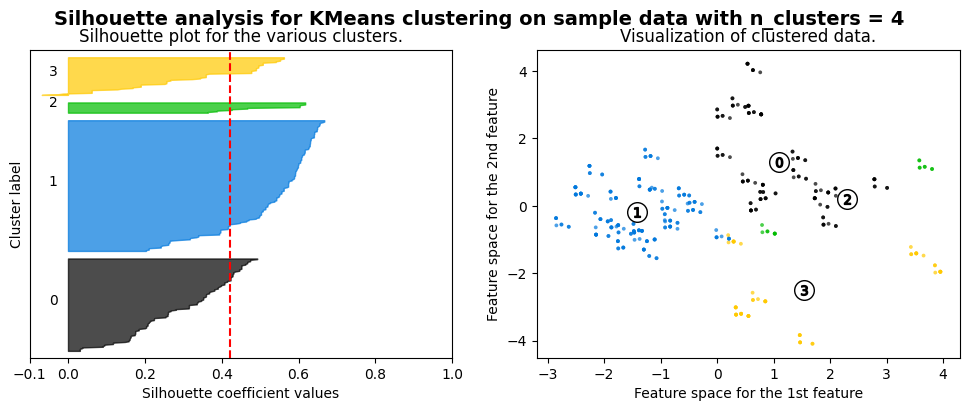

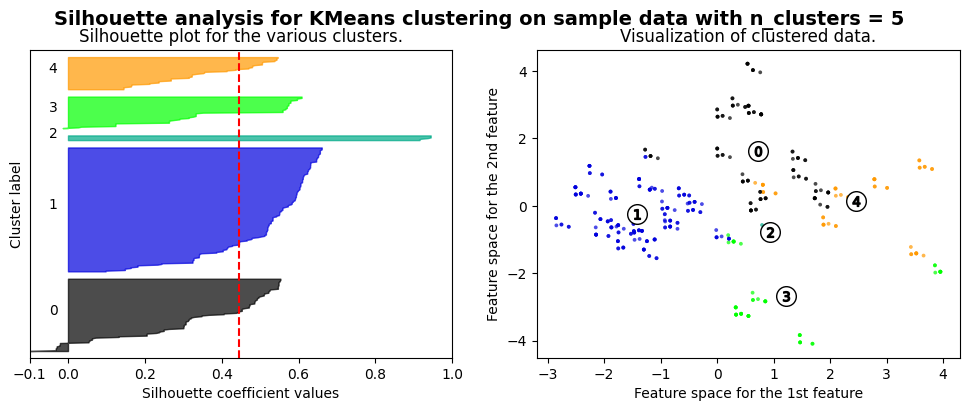

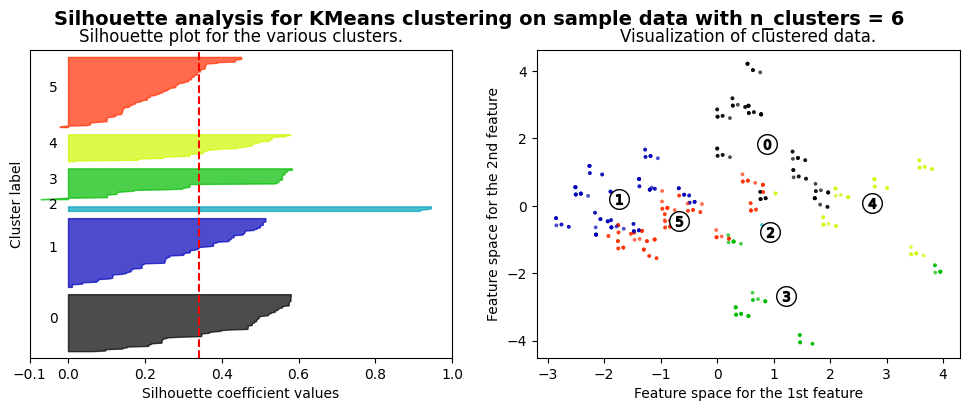

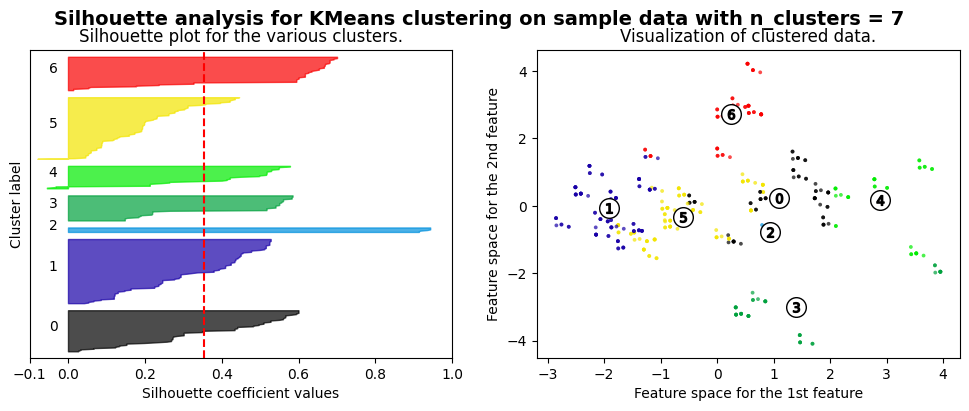

In [379]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(pca_features) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(pca_features)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(pca_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_features[:, 0], pca_features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



617.8824936936722


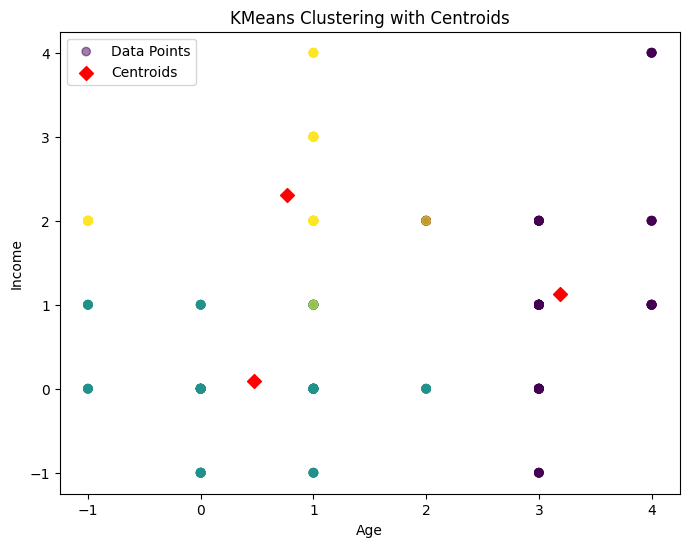

In [380]:
kmeans_standard = KMeans(n_clusters=3, random_state=42)
kmeans_standard.fit(encoded_data)

centroids = kmeans_standard.cluster_centers_

cluster_labels = kmeans_standard.labels_

# Get the distance between each point and the nearest centroid
distances = kmeans_standard.transform(encoded_data)

# Get the inertia (sum of squared distances to nearest centroid)
inertia = kmeans.inertia_
# print(labels)
print(inertia)
# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(encoded_data.iloc[:, 0], encoded_data.iloc[:, 2], c=cluster_labels, cmap='viridis', alpha=0.5, label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 2], marker='D', s=50, c='red', label='Centroids')

plt.legend()
plt.title('KMeans Clustering with Centroids')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

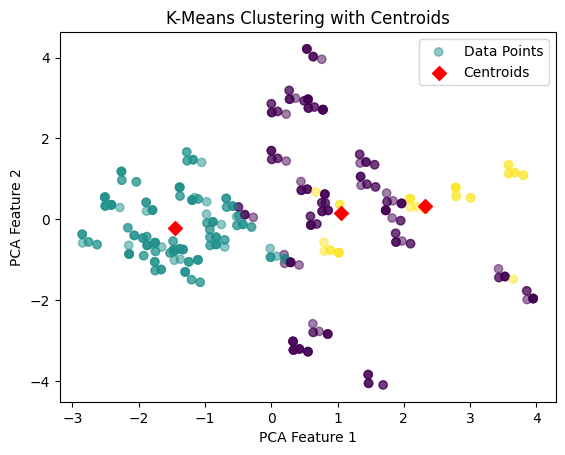

In [381]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(pca_features)
# Scatter plot of data points
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, alpha=0.5, label='Data Points')

# Scatter plot of centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='D', s=50, c='red', label='Centroids')

# Show the plot
plt.legend()
plt.title('K-Means Clustering with Centroids')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

In [382]:
# Image will be displayed in the readme file as well
import plotly.express as px

# Scatter plot of data points
fig = px.scatter(x=pca_features[:, 0], y=pca_features[:, 1], color=cluster_labels, opacity=0.5, labels={'x': 'PCA Feature 1', 'y': 'PCA Feature 2'}, title='K-Means Clustering with Centroids', template='plotly_white')

# Scatter plot of centroids
fig.add_scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers', marker=dict(symbol='diamond', size=10, color='red'), name='Centroids')

fig.show()